# Importing Libraries

In [47]:
import pandas as pd # To load the data set
import numpy as np # For calculation
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns # For Visualization

In [48]:
# Loading the Dataset
data = pd.read_csv('advertising.csv')


In [49]:
# Top 5 rows 
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [50]:

data.info()
print( '----------------------------------------------------')
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
----------------------------------------------------


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

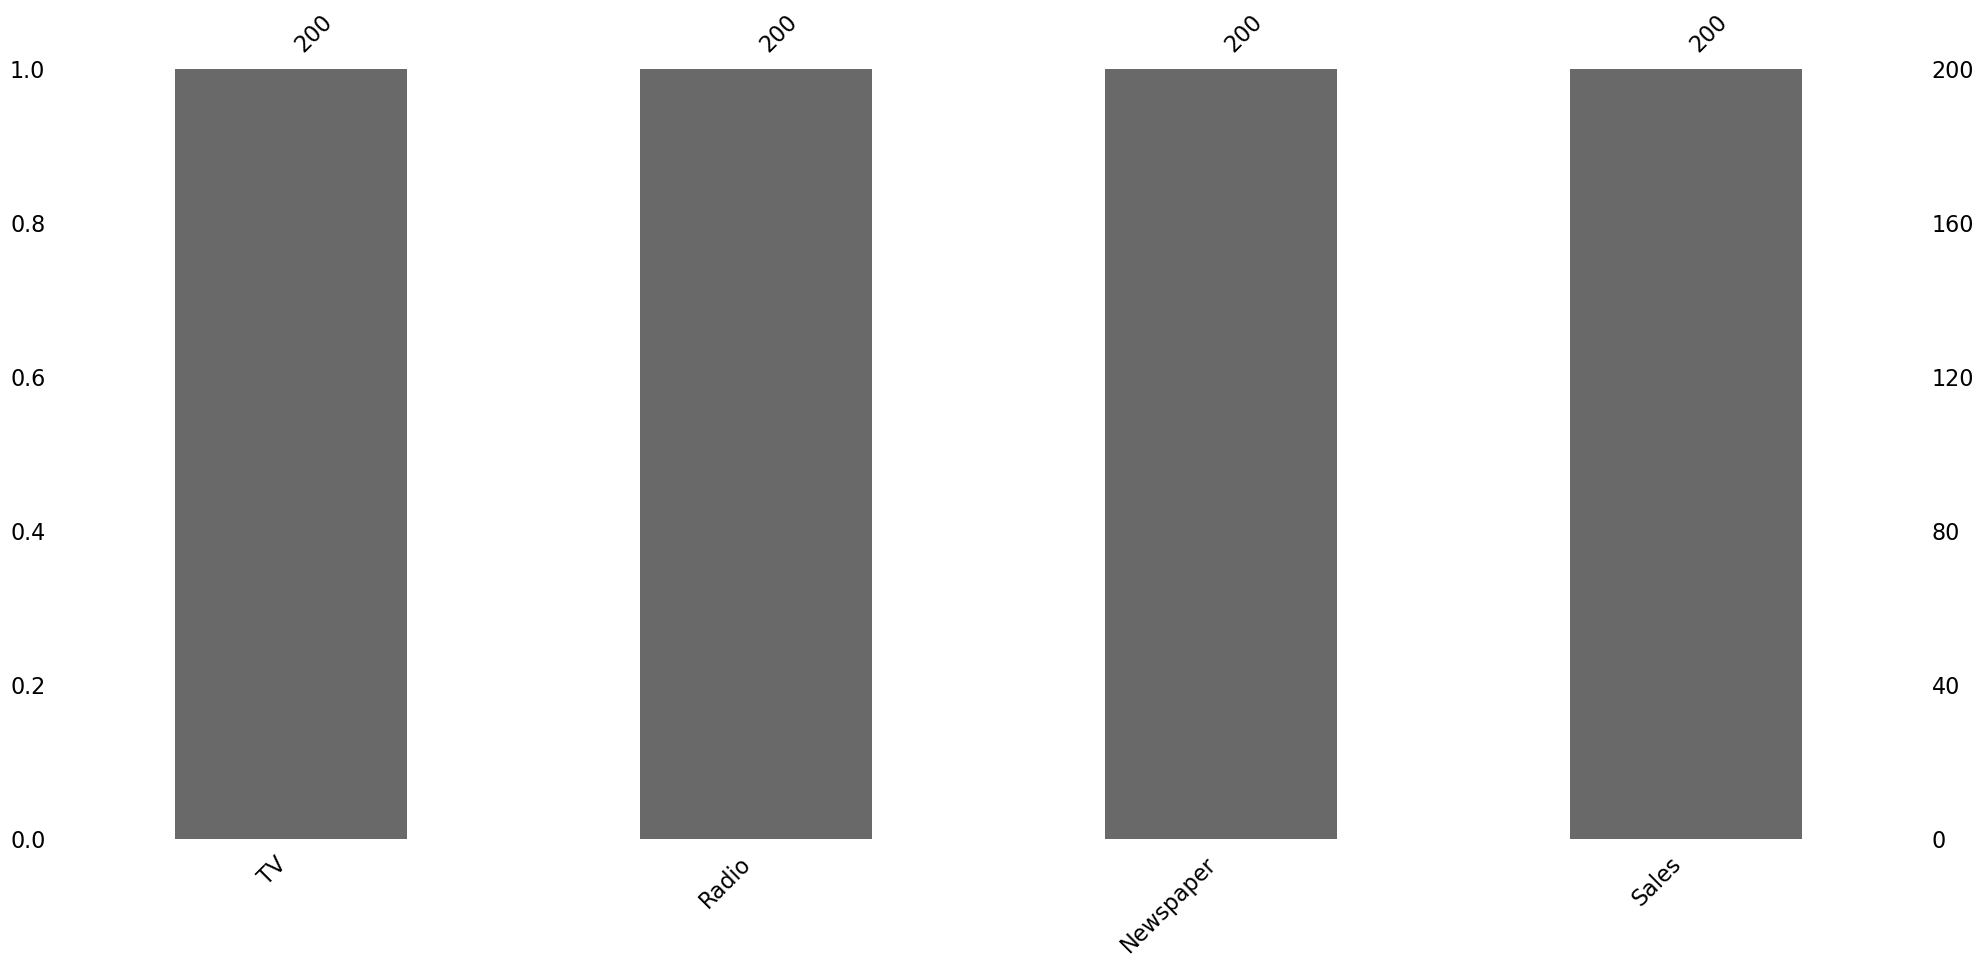

In [51]:
# Lets for Null values
import missingno as msno
msno.bar(data)

In [52]:
# No missing value present in our dataset

In [53]:
# Check for null values
data.isnull().sum() * 100/ data.shape[0]


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [54]:
# No null values

# Exploratory Data Analysis

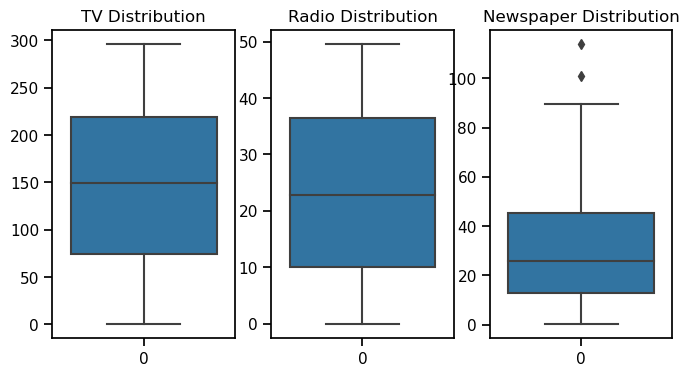

In [55]:
# Outlier 
fig, axis = plt.subplots(ncols=3, figsize = (8,4))
plt1 = sns.boxplot(data['TV'] , ax= axis[0])
plt1.set_title('TV Distribution')
plt2 = sns.boxplot(data['Radio'] , ax = axis[1])
plt2.set_title('Radio Distribution')
plt3 = sns.boxplot(data['Newspaper'] , ax = axis[2])
plt3.set_title('Newspaper Distribution')
plt.show()


There are no Considerable outliers present in our data set 

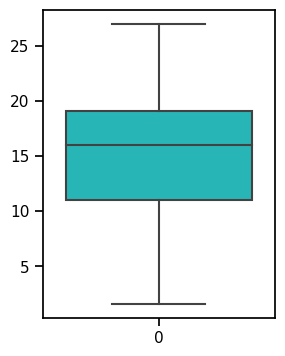

In [56]:
# Target Variable is Sales
plt.figure(figsize = (3,4))
sns.boxplot(data['Sales'], color = '#11cccc')
plt.show()

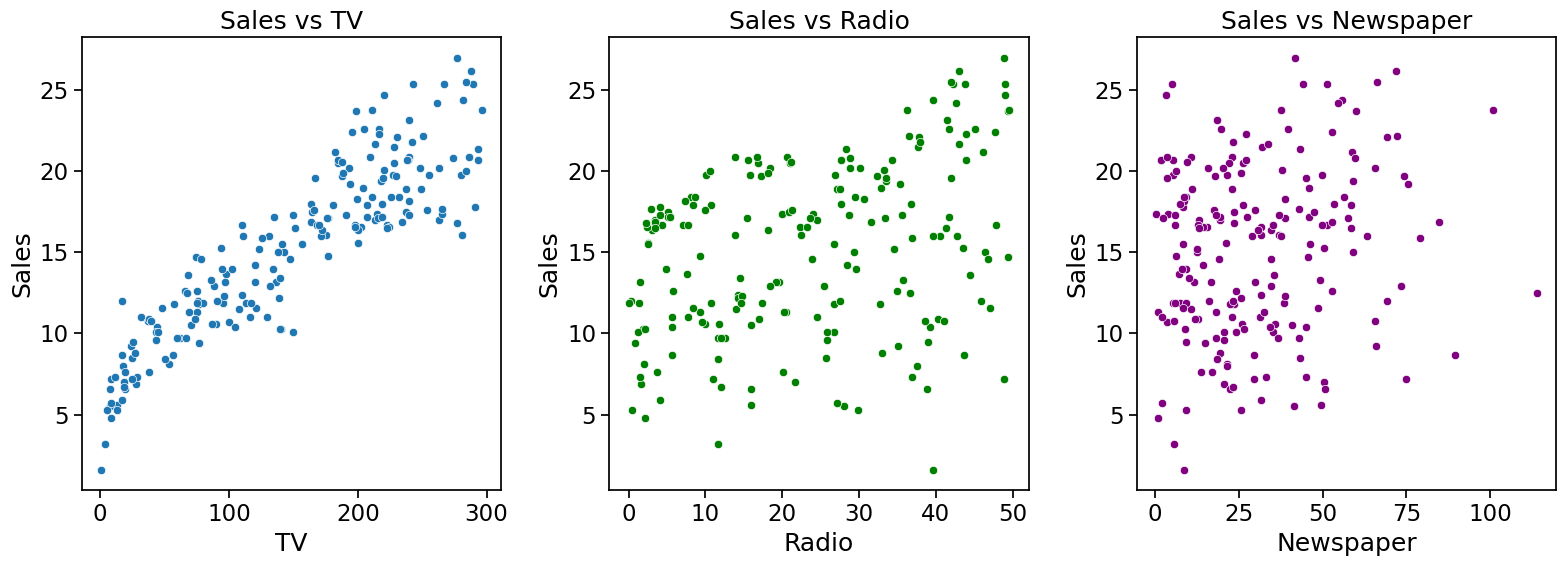

In [57]:
# Scatter plot to check for relationship between Sales and different Variables

sns.set_context('notebook',font_scale=1.5)

fig , axis = plt.subplots(ncols = 3 , figsize=(16,6))
plt1 = sns.scatterplot(data = data , x ='TV', y='Sales' , ax = axis[0])
plt1.set_title('Sales vs TV')

plt2 = sns.scatterplot(data = data , x = 'Radio' , y = 'Sales',color = 'green' , ax = axis[1])
plt2.set_title('Sales vs Radio')

plt3 = sns.scatterplot(data = data , x = 'Newspaper' , y = 'Sales' , color = 'purple' ,ax = axis[2])
plt3.set_title('Sales vs Newspaper')

plt.tight_layout()
plt.show()

In [58]:
# The relation between TV and sales is strong and increase in linear fashion
# The relation between Radio and Sales is less Strong
# The relation between Newspaper and Sales is weak

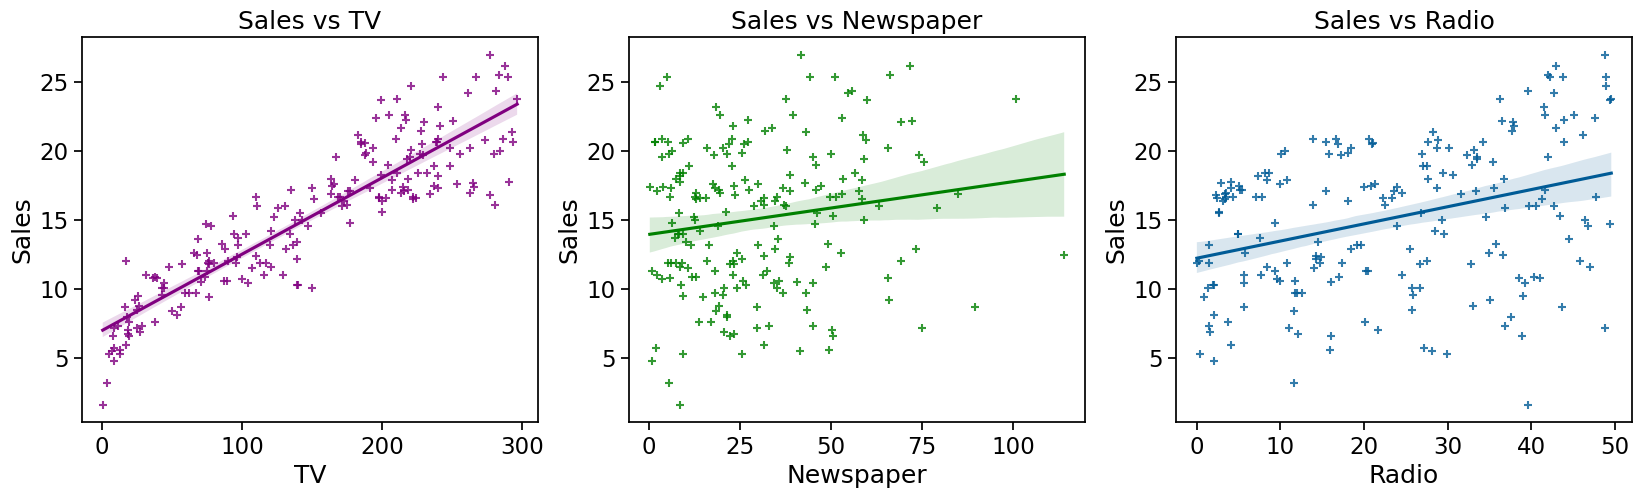

In [59]:
# let us try to plot a regression line
sns.set_context('notebook',font_scale=1.5)

fig ,ax = plt.subplots(1 , 3 , figsize = (20,5))

sns.regplot(x = data['TV'] , y = data['Sales'] , marker= '+' , color = 'purple' , ax = ax[0])
ax[0].set(title = 'Sales vs TV' , xlabel = 'TV' , ylabel = 'Sales')

sns.regplot(x= data['Newspaper'], y=data['Sales'],color = 'green', marker = '+', ax = ax[1])
ax[1].set(title = 'Sales vs Newspaper', xlabel = 'Newspaper', ylabel = 'Sales')

sns.regplot(x= data['Radio'], y=data['Sales'],marker= '+' ,color = '#005b96', ax = ax[2])
ax[2].set(title = 'Sales vs Radio', xlabel = 'Radio', ylabel = 'Sales')

plt.show()

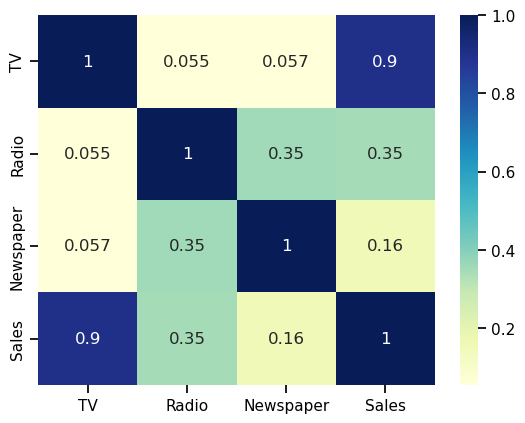

In [60]:
sns.set_context('notebook' , font_scale= 1)
sns.heatmap(data.corr() ,cmap = 'YlGnBu' , annot = True)
plt.show()

# Modeling

In [61]:
# Since TV is highly correlated with Sales. We will TV as Independent Variable

In [62]:
# Define X(Independent) and y (Dependent) 
X = np.array(data['TV']).reshape(-1,1)
y = np.array(data['Sales']).reshape(-1,1)

In [63]:
# Spliting the Training and Test Data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y ,train_size= 0.7 , test_size= 0.3 , random_state= 30)

In [64]:
print('X_train : {}'.format(X_train.shape))
print('X_test : {}'.format(X_test.shape))
print('y_train : {}'.format(y_train.shape))
print('y_test : {}'.format(y_test.shape))



X_train : (140, 1)
X_test : (60, 1)
y_train : (140, 1)
y_test : (60, 1)


In [65]:
# Training the model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [66]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

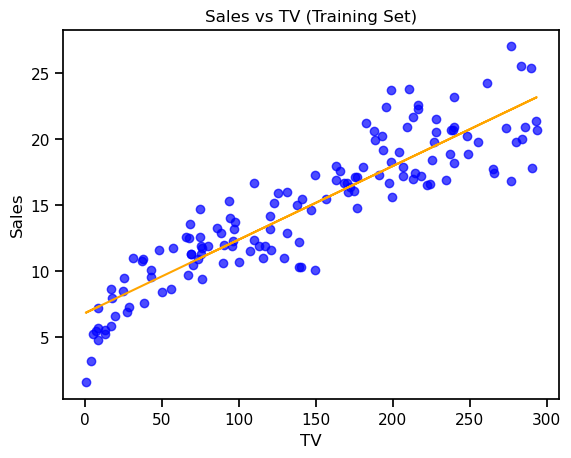

In [67]:
# Visualising the Training Set
plt.scatter(X_train , y_train , color = 'blue' , alpha= 0.7)
plt.plot(X_train , regressor.predict(X_train) , color ='orange')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV (Training Set)')
plt.show()

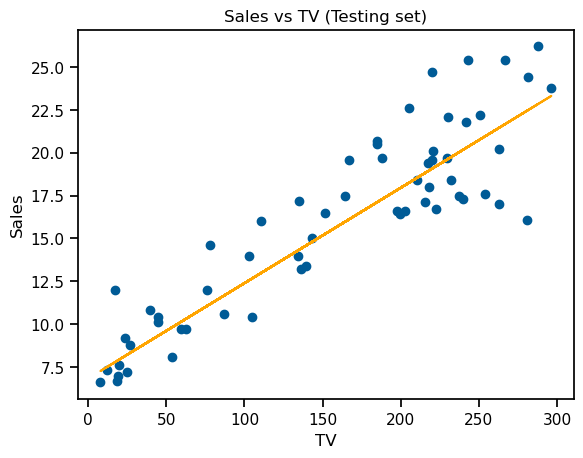

In [68]:
# Visualising test set results
plt.scatter(X_test, y_test, color= '#005b96')
plt.plot(X_test, regressor.predict(X_test), color = "orange")
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV (Testing set)')
plt.show()

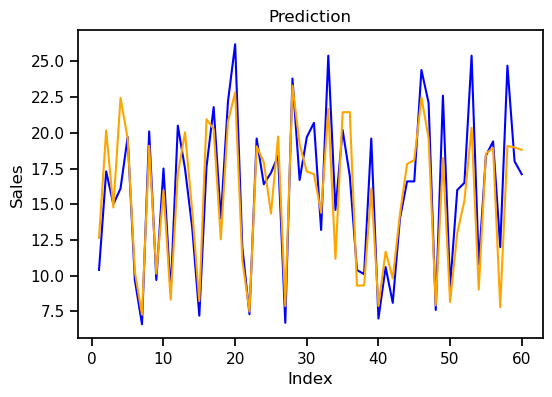

In [69]:
# Ploting the Predicted value and actual value.
c = [i for i in range(1,61,1)]
plt.figure(figsize = (6,4))
plt.plot(c , y_test , color = 'blue')
plt.plot(c , y_pred , color = 'orange')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()


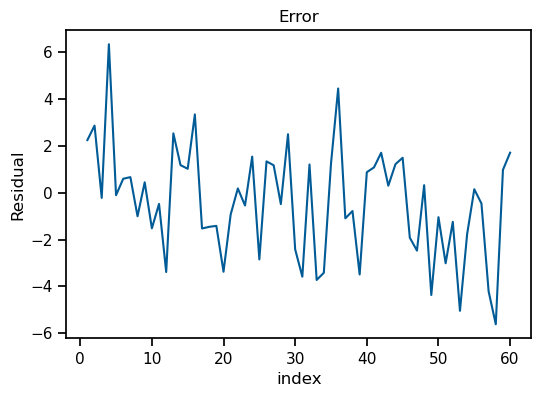

In [70]:
# Plotting the residual
residual = y_pred - y_test
plt.figure(figsize = (6,4))
plt.plot(c , residual ,color = '#005b96')
plt.xlabel('index')
plt.ylabel('Residual')
plt.title('Error')
plt.show()

# Model Evaluation

In [71]:
# Checking The Accuracy of Model
from sklearn.metrics import r2_score , mean_squared_error

mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)

rsquare = r2_score(y_test,y_pred)



In [72]:
print('Root Mean Square Error :',rmse)
print('R-square :',rsquare)

Root Mean Square Error : 2.384715142649146
R-square : 0.8041810851835126


In [73]:
# Intercept and coef of the line
print('Intercept of the model:', regressor.intercept_)
print('Coefficient of the line:', regressor.coef_[0])

Intercept of the model: [6.83260405]
Coefficient of the line: [0.05560761]


Thus the equation of the line is Sales = 0.06 * TV + 6.83